# Gradient Descent Optimization

## Table of contents:
* [Vanilla Gradient Descent](#vanilla)
* [Stochastic Gradient Descent](#sgd)
* [Minibatch Gradient Descent](#minibatch)
* [Momentum](#momentum)
* [Nesterov Momentum](#nag)
* [Adagrad](#nag)
* [RMS Prop](#rms)
* [Adam](#adam)

# Non-linear logistic regression

In the linear logistic regressions for 2-class classifications, we employed such bases, using $\mathbf{x} \leftarrow \big[1, \mathbf{x}^{T} \big]^{T}$ and $\mathbf{\phi} \leftarrow \big[\phi_{0},\mathbf{\phi}^{T} \big]^{T}$,

$$\begin{align}
p(w=1|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
p(w=0|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{x}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{x})}\\
Bern_{w}(\mathbf{a}) \quad & = &\quad \prod_{i}^{N} a_{i}^{w_{i}}(1 - a_{i})^{1 - w_{i}}
\end{align}$$

We extend the linear logistic regressions to employ non-linear bases.

$$\begin{align}
p(w=1|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
p(w=0|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{z}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z})}
\end{align}$$

Here, for a choice of $K$ and $f$,

$$\begin{align}
\mathbf{z} \quad & = &\quad \big[1, f_{1}(\mathbf{x}), \cdots, f_{K}(\mathbf{x})\big]^{T}
\end{align}$$

Among the choice of $f$'s,

$$\begin{align}
z_{k} \quad & = &\quad heaviside[\mathbf{\alpha}_{k}^{T}\mathbf{x}] \quad & = &\quad 1 \quad if \quad \mathbf{\alpha}_{k}^{T}\mathbf{x} > 0 \quad and \quad 0 \quad otherwise\\
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
z_{k} \quad & = &\quad gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda] \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)
\end{align}$$

Let us concatenate all the parameters.

$$\begin{align}
\mathbf{\theta} \quad & = &\quad \big[\mathbf{\phi}^{T}, \mathbf{\alpha}_{1}^{T}, \cdots,  \mathbf{\alpha}_{K}^{T} \big]^{T}
\quad & = &\quad \big[\phi_{0}, \phi_{1}, \cdots, \phi_{K}, \alpha_{1, 1}, \cdots, \alpha_{D, 1}, \cdots, \alpha_{1, K}, \cdots, \alpha_{D, K} \big] \quad \Rightarrow \quad _{(K+1 + KD) \times 1}\\
\end{align}$$

We can choose the loglikelihood as the logistic cost function.

$$\begin{align}
L(\mathbf{\theta}) \quad & = &\quad log \bigg[Bern_{w}(\mathbf{a}) \bigg]\\
 \quad & = &\quad \sum_{i}^{N} w_{i}log(a_{i}) + (1 - w_{i})log(1 - a_{i}) \\
 \quad & = &\quad \sum_{i}^{N} w_{i}log\bigg(\frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}\bigg) + (1 - w_{i})log \bigg( \frac{exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})} \bigg) \\
\end{align}$$

Let us write the following explicitly for the case of $z_{i, k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}_{i}, \lambda]$

$$\begin{align}
a_{i} \quad & = &\quad \mathbf{\phi}^{T}\mathbf{z_{i}} \quad & = &\quad \sum_{k=0}^{K} \phi_{k}z_{i,k} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} z_{i,k}
\end{align}$$

In order to minimize the cost function, we employ gradient descents which requires first order derivative of the cost function with respect to the parameters.

$$\begin{align}
\frac{\partial L(\mathbf{\theta})}{\partial\theta_{j}} \quad & = &\quad - \sum_{i}^{N} ( w_{i} - sig[a_{i}]) \frac{\partial a_{i}}{\partial\theta_{j}}
\end{align}$$

When $z_{k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda]$,

$$\begin{align}
z_{k} \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} exp\bigg(-\frac{1}{\lambda}\sum_{d=1}^{D} ({x}_{i, d} - \alpha_{d, k})^{2}\bigg)
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{z_{i, k}}{\lambda}(x_{i,d} - \alpha_{dk})\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

When $z_{k} = arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]$,

$$\begin{align}
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} arctan \bigg[\alpha_{d, 0}\cdot 1 + \sum_{d=1}^{D} \alpha_{d, k}{x}_{i, d}\bigg]
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{x_{i, d}}{1 + z_{i, k}^{2}}\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [3]:
def generate_data_set_dim2_nonlinear(ns):
    """
    this function generates a 2d data set of two classes which are linearly separated.
    
    Arguments:
        ns: number of samples
    
    Output:
        ds1: data on the negative side (3, ns). ds1[1] = 0 is the label.
        ds2: data on the positive side (3, ns). ds2[1] = 0 is the label.
        data  : data combined ds1 and ds2 and shuffled. (2, ns)
        label : label combined ds1 and ds2 and shuffled. (2, ns)
        datab : data combined ds1 and ds2 and shuffled. datab[0] = 1 for bias. (3, ns)
    """
    ns_neg1 = int(0.25 * ns)
    ns_neg2 = int(0.25 * ns)
    ns_neg  = ns_neg1 + ns_neg2
    ns_pos1 = int(0.25 * ns)
    ns_pos2 = ns - ns_neg1 - ns_neg2 - ns_pos1
    ns_pos  = ns_pos1 + ns_pos2
    amp = 5.
    mus = amp * np.array([-1., 1., -1., 1.])
    
    dt_neg1 = np.random.standard_t(3, size=ns_neg1) + mus[0]
    dt_neg2 = np.random.standard_t(3, size=ns_neg2) + mus[1]
    ds1x = np.hstack((dt_neg1, dt_neg2))
    ds1y = 1.5 * amp * (np.random.rand(ns_neg) - .5)
    ds1 = np.vstack((ds1x, ds1y))
    
    dt_pos1 = np.random.standard_t(3, size=ns_pos1) + mus[2]
    dt_pos2 = np.random.standard_t(3, size=ns_pos2) + mus[3]
    ds2x = np.hstack((dt_pos1, dt_pos2))
    ds2y = 1.5 * amp * (np.random.rand(ns_pos) - .5)
    ds2 = np.vstack((ds2x, ds2y))
    
    ang = 0.25 * np.pi
    c, s = np.cos(ang), np.sin(ang)
    rot1 = np.array([[c, s], [-s, c]])
    
    ang = -ang
    c, s = np.cos(ang), np.sin(ang)
    rot2 = np.array([[c, s], [-s, c]])
    
    ds1 = np.dot(rot1, ds1)
    ds2 = np.dot(rot2, ds2)
    
    ds1s = np.vstack((ds1, np.zeros(ns_neg)))
    ds2s = np.vstack((ds2, np.ones(ns_pos)))
    ds = np.hstack((ds1s, ds2s))
    np.random.shuffle(ds.T)
    
    data = ds[:2]
    label = ds[2][np.newaxis, :]
    
    datas, mu, sg = scale_coordinates(data)
    ds1s = (ds1[:2] - mu)/sg
    ds2s = (ds2[:2] - mu)/sg
    
    plt.plot(ds1s[0], ds1s[1], 'r.', markersize=3)
    plt.plot(ds2s[0], ds2s[1], 'b.', markersize=3)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    return ds1s, ds2s, datas, label


def plot_decision_boundary_dim2(phi, alp, lmd):
    """
    this function computes sigmoid function
    
    Arguments:
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)
        ddLdtdt: ((K+1+KD), (K+1+KD))
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = alp.shape[0]
    K = alp.shape[1]
    K1 = phi.shape[1]
    N = 201
    nn = N**2
    x = np.linspace(-3, 3, N)
    y = np.linspace(-3, 3, N)
    xg, yg = np.meshgrid(x, y)
    xss = xg.reshape(1, nn)
    yss = yg.reshape(1, nn)
    xys = np.vstack((xss, yss))
    z = radial_basis(xys, alp, lmd, D, K, nn)
    bd = sigmoid(z, phi).reshape(N, N)
    bd = np.flipud(bd)
    plt.imshow(bd, extent=[-3, 3, -3, 3])
    return bd


def scale_coordinates(x):
    mu = x.mean(keepdims=1)
    sg = x.std()
    xs = (x - mu)/sg
    return xs, mu, sg


In [4]:
def radial_basis(x, alp, lmd, D, K, N):
    """
    this function computes sigmoid function
    
    Arguments:
        x:   (D, ns)  D contains bias as well.
        label:   (1, ns)
        phi  :   (1, D)
        alpha:   scalar
        sgp  :   scalar. prior sigma
    
    Output:
        bases: (D, nx).
    """
    assert alp.shape[0] == x.shape[0]
    bases = np.ones((K + 1, N))
    for i in range(1, K + 1):
        bases[i, :] = spst.multivariate_normal.pdf(x.T, mean=alp[:, i-1], cov=lmd*np.eye(D))
    return bases


def dRB_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    assert alp.shape[0] == x.shape[0]
    xx = np.tile(x, (K, 1))
    alpx = np.reshape(alp.T, (K*D, 1))
    zx = np.kron(z[1:], np.ones((D, 1)))
    dzdalp = (xx - alpx) * zx / lmd
    return dzdalp

In [5]:
def dz_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    return dRB_dalp(x, z, alp, lmd, D, K, N)


def da_dphi(z):
    """
    this function generates da/dphi.
    
    Arguments:
        z: generated bases including bias at the zeroth row. ((K+1), N).
    
    Output:
        z: da/dphi. ((K+1), N)
    """
    return z


def da_dalp(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1), N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        phit  : phi_trancated. without bias. (1, K)
        phix  : phi_extended.  (1, KD)
        dzda  : dzdalp. ((KD), N)
        xx    : (K*D, N)
        alpx  : (K*D, 1)

    Output:
        da/dalp: (K*D, N)
    """
    phit = phi[:, 1:]
    dzda = dz_dalp(x, z, alp, lmd, D, K, N)
    phix = np.kron(phit, np.ones((1, D)))
    dadalp = phix.T * dzda
    return dadalp


def da_dtheta(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dtheta.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        da/dtheta: ((K+1+KD), N)
    """
    K1 = K + 1
    dadt = np.zeros((K1 + K*D, N))
    dadt[:K1, :] = da_dphi(z)
    dadt[K1:, :] = da_dalp(z, x, phi, alp, lmd, D, K, N)
    return dadt


def dL_dtheta(z, x, w, phi, alp, lmd, D, K, N):
    """
    this function generates dda/dphidalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        w  : label. (1, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        sig   : (N, 1)
        dadt  : ((K+1+KD), N)
        dlt   : (1, N)

    Output:
        dLdt: ((K+1+KD), 1)
    """
    dadt = da_dtheta(z, x, phi, alp, lmd, D, K, N)
    sig = sigmoid(z, phi)
    dLdt = np.dot(dadt, w.T - sig)
    dLdt *= -1
    return dLdt

In [22]:
def cost_function(z, w, phi):
    """
    this function computes logistic cost function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        w   :  (1, N)
        phi :  (1, K + 1)
    
    Output:
        L:     scalar. cost function.
    """
    sig = sigmoid(z, phi)
    wlogsig1 = np.dot(w, np.log(sig))
    wlogsig2 = np.dot(1 - w, np.log(1 - sig))
    L = wlogsig1 + wlogsig2
    return -L

    
def sigmoid(z, phi):
    """
    this function computes sigmoid function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        phi :  (1, K + 1)
    
    Output:
        sig  :  (N, 1)
    """
    phix = np.dot(phi, z)
    phix[phix > 250] = 250
    phix[phix < -250] = -250
    sig = 1/ (1 + np.exp(-phix))
    return sig.T


def optimization_method(method):
    if method == "momentum":
        return momentum_gradient_descent
    else:
        raise KeyError("the method given does not exist.")


def optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, method):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1), N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = x.shape[0]
    D1 = D + 1
    K = alp.shape[1]
    K1 = K + 1
    N = x.shape[1]
    dlt = 1
    step = 0
    Ls = np.zeros(nnn)
    alps = np.zeros((nnn, D, K))
    alps[0] = alp
    cost = cost_function(z, w, phi)
    Ls[step] = cost
    update_params = optimization_method(method)
    v = np.zeros((1, K1 + K *D))
    while dlt > 0.0000001:
        temp = cost
        step += 1
        if step == nnn:
            break
        z = radial_basis(x, alp, lmd, D, K, N)
        bt = beta / np.sqrt(step)
        phi, alp, v = update_params(z, x, w, phi, alp, lmd, sgps, D, K, N, v, beta)
        cost = cost_function(z, w, phi) 
        alps[step, :, :] = alp
        Ls[step] = cost
        dlt = np.abs(cost - temp)
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    param_description(step, theta.squeeze(), lmd, sgps, beta, D, K)
    cost = Ls[:step]
    alpss = alps[:step, :, :]
    return phi, alp, theta, cost, step, alpss


def param_description(step, theta, lmd, sgps, beta, D, K):
    K1 = K + 1
    strng = '{:d} steps done for beta = {:1.2f}, lambda = {:1.2f} and prior std**2 = {:1.2f}: '.format(step, beta, lmd, sgps)
    strng += '\nphi = \n'
    for i in range(K1):
        strng += '{:1.4f}, '.format(theta[i])
    strng += '\nalp = '
    for d in range(D):
        strng += '\n'
        for i in range(K1+d, K1+K*D, D):
            strng += '{:1.4f}, '.format(theta[i])
    strng += '\n'
    print(strng)


def momentum_gradient_descent(z, x, w, phi, alp, lmd, sgps, D, K, N, v, beta):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1) * N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)

    Output:
        theta: (1, (K+1+KD))
    """
    K1 = K + 1
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    dLdt  = dL_dtheta(z, x, w, phi, alp, lmd, D, K, N)
    vup   = beta * dLdt.T + theta / sgps
    theta -= 0.9 * v + vup
    v = vup
    phi = theta[0, :K1].reshape(1, K1)
    alp = theta[0, K1:].reshape(K, D).T
    return phi, alp, v



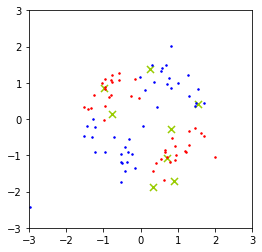

In [9]:
D = 2
K = 8
N = 80
nnn = 10000

plt.rcParams['figure.figsize'] = (4.0, 4.0)
ds1, ds2, x, w = generate_data_set_dim2_nonlinear(N)

alp = 2 * 2 * (np.random.rand(D, K) - 0.5)
plt.scatter(alp[0], alp[1], s=50, c=(0.6, 0.8, 0.), marker='x')

In [10]:
phi = 2 * 2 * (np.random.rand(1, K + 1) - 0.5)

3000 steps done for beta = 0.02, lambda = 0.20 and prior std**2 = 10000.00: 
phi = 
0.2047, -11.7695, 8.7413, 12.6941, -14.1038, 11.6448, 0.3289, 10.5997, -10.5358, 
alp = 
1.4860, -1.4692, -0.3797, -0.7259, 1.0997, -2.5866, 0.7042, 0.6855, 
-0.7107, -0.6186, -0.9566, 0.9027, 0.6115, 1.5859, 1.4570, -1.3098, 

3000 steps done for beta = 0.02, lambda = 0.50 and prior std**2 = 10000.00: 
phi = 
0.7620, -15.3615, 10.9940, 10.3435, -24.6643, 13.1702, 9.3572, 13.7910, -15.3166, 
alp = 
1.2337, -1.4071, -1.0876, -0.9646, 1.0440, -0.7943, 1.0500, 1.2334, 
-1.1291, -1.0090, -1.0657, 0.8113, 1.1533, -1.0448, 1.1526, -1.1294, 

3000 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 10000.00: 
phi = 
-0.3114, -18.7529, 17.1426, 16.7414, -29.0460, 19.7743, 15.5550, 20.6261, -18.9495, 
alp = 
1.3621, -1.2103, -1.2102, -1.0994, 1.1881, -1.2101, 1.1881, 1.3621, 
-1.2569, -1.3205, -1.3205, 0.9492, 1.2250, -1.3205, 1.2250, -1.2569, 

3000 steps done for beta = 0.02, lambda = 1.50 and prior s

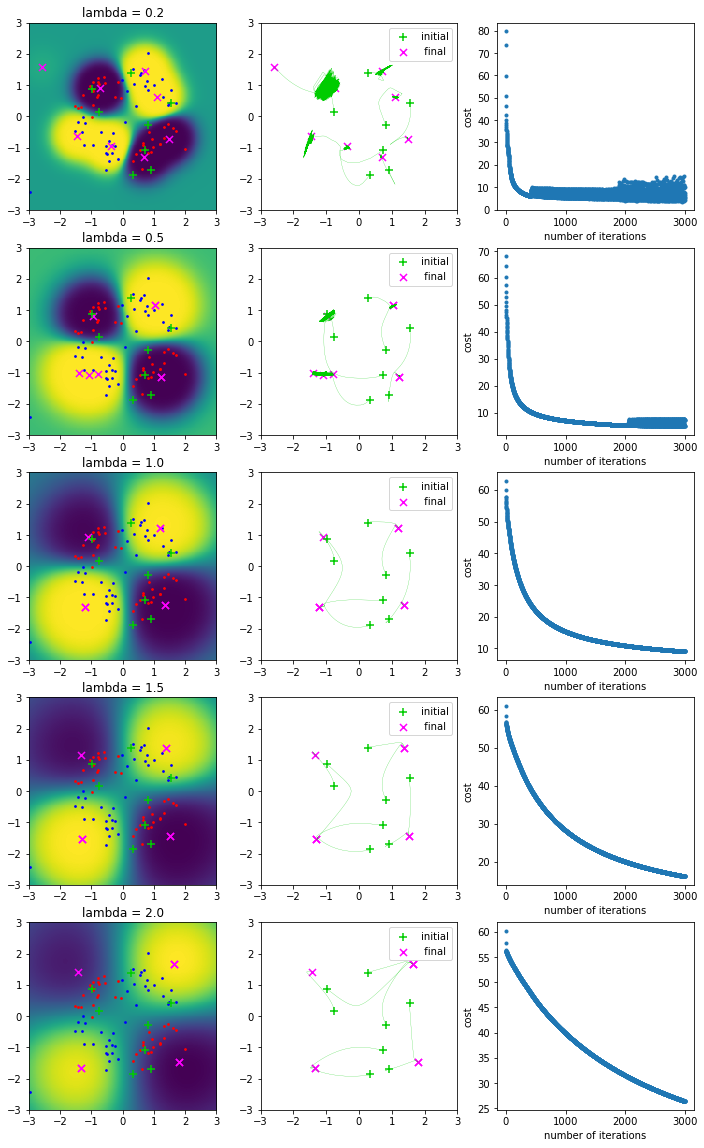

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 3000
beta = 0.02
sgps = 10000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

3000 steps done for beta = 0.02, lambda = 0.20 and prior std**2 = 10000.00: 
phi = 
0.8794, -10.2152, 6.4048, 9.0408, -9.0127, 8.6295, -5.8051, 7.7378, -9.2109, 
alp = 
1.5042, -1.5861, -0.3982, -0.9663, 1.0401, -1.2603, 0.5190, 0.6650, 
-0.6992, -0.7455, -1.0494, 0.7674, 0.6768, 0.3840, 1.3452, -1.2642, 

3000 steps done for beta = 0.02, lambda = 0.50 and prior std**2 = 10000.00: 
phi = 
0.6769, -12.5393, 8.4268, 8.0512, -20.7778, 10.5080, 7.4763, 10.8680, -12.5224, 
alp = 
1.1869, -0.9688, -0.9662, -0.8512, 0.9498, -0.9617, 0.9499, 1.1869, 
-1.0754, -0.9634, -0.9632, 0.7140, 1.0531, -0.9627, 1.0533, -1.0754, 

3000 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 10000.00: 
phi = 
-0.3182, -15.1171, 13.3991, 13.1747, -23.1634, 15.9597, 12.4893, 16.4450, -15.2350, 
alp = 
1.3234, -1.1478, -1.1477, -1.1244, 1.1903, -1.1473, 1.1904, 1.3235, 
-1.2393, -1.2971, -1.2970, 0.9715, 1.2270, -1.2968, 1.2270, -1.2393, 

3000 steps done for beta = 0.02, lambda = 1.50 and prior std**2 

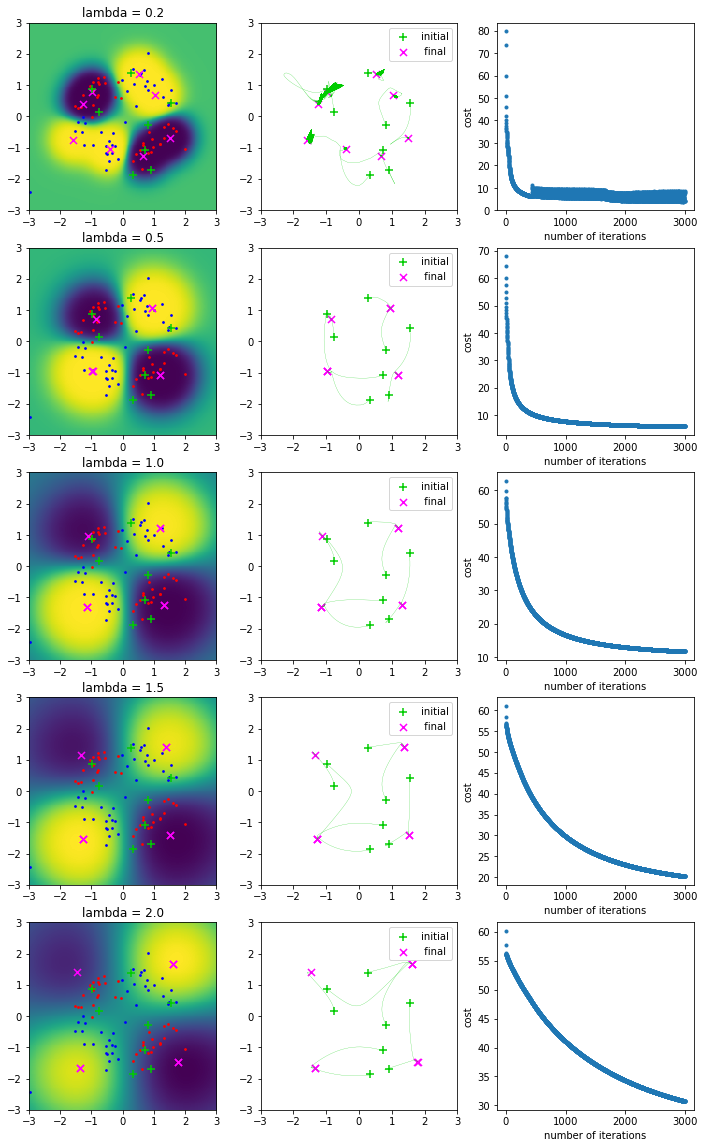

In [23]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 3000
beta = 0.02
sgps = 10000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

500 steps done for beta = 0.02, lambda = 0.20 and prior std**2 = 10000.00: 
phi = 
0.2293, -7.0088, 5.9321, 6.9520, -9.9764, 6.2482, 0.3073, 6.8657, -6.1136, 
alp = 
1.4615, -1.3928, -0.4549, -0.6928, 1.1809, -2.2794, 0.7370, 0.6741, 
-0.6803, -0.5904, -1.0208, 1.0335, 0.6133, 1.3575, 1.4078, -1.2566, 

500 steps done for beta = 0.02, lambda = 0.50 and prior std**2 = 10000.00: 
phi = 
-0.1055, -7.5549, 6.8921, 6.2883, -11.5418, 7.9996, 5.3640, 8.5786, -7.5277, 
alp = 
1.1434, -0.9042, -0.9036, -0.9047, 0.9916, -0.9024, 0.9917, 1.1434, 
-1.0435, -0.9909, -0.9907, 0.7785, 1.0567, -0.9903, 1.0568, -1.0435, 

500 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 10000.00: 
phi = 
-0.4107, -7.6246, 7.7058, 7.3449, -10.5939, 8.7186, 6.2427, 9.4990, -7.8142, 
alp = 
1.3071, -1.0610, -1.0608, -1.1600, 1.1934, -1.0602, 1.1936, 1.3072, 
-1.2084, -1.2792, -1.2790, 1.0228, 1.2500, -1.2785, 1.2502, -1.2084, 

500 steps done for beta = 0.02, lambda = 1.50 and prior std**2 = 10000.00: 
phi

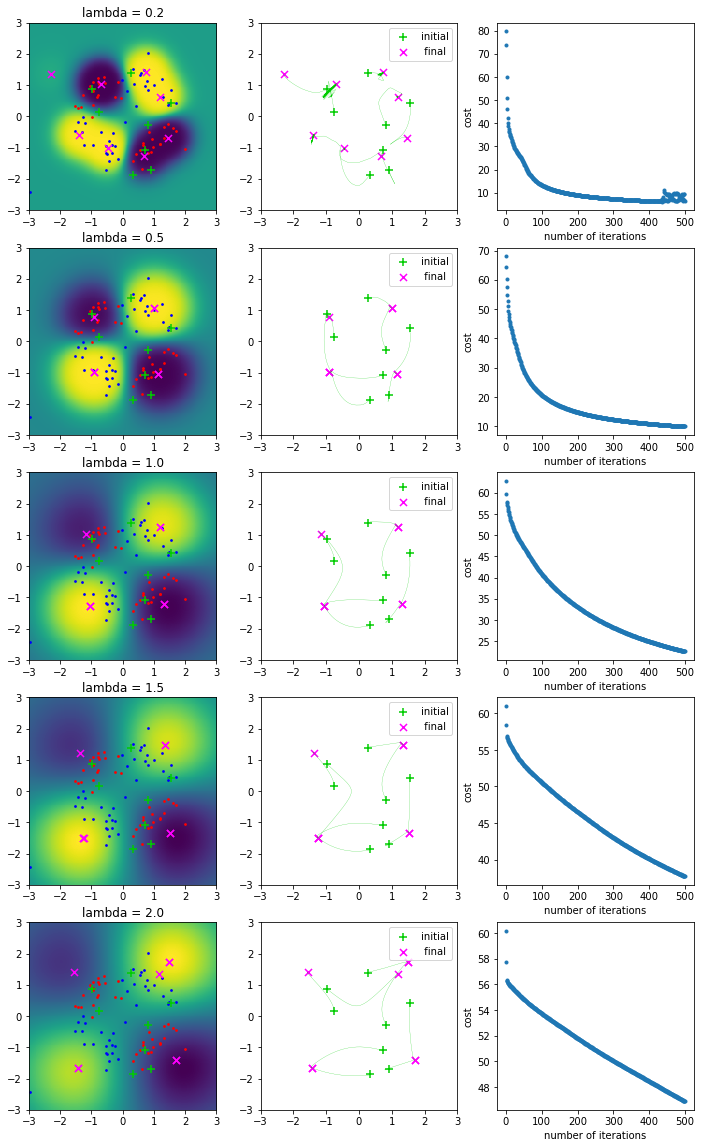

In [24]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 500
beta = 0.02
sgps = 10000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

1000 steps done for beta = 0.02, lambda = 0.20 and prior std**2 = 1000.00: 
phi = 
0.8299, -6.0257, 3.7046, 4.6148, -6.2486, 3.7481, -4.9816, 4.3706, -5.8508, 
alp = 
1.4684, -1.3451, -0.4781, -0.6424, 1.2681, -1.0674, 0.5768, 0.6936, 
-0.6581, -0.5261, -1.0354, 0.7726, 0.6839, 0.5511, 1.1943, -1.2146, 

1000 steps done for beta = 0.02, lambda = 0.50 and prior std**2 = 1000.00: 
phi = 
-0.0229, -6.0716, 4.6458, 4.5509, -9.1378, 5.9865, 4.3940, 6.0839, -6.0851, 
alp = 
1.1194, -0.8497, -0.8493, -0.9263, 0.9836, -0.8484, 0.9837, 1.1194, 
-1.0197, -0.9747, -0.9744, 0.8162, 1.0497, -0.9738, 1.0500, -1.0198, 

1000 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 1000.00: 
phi = 
-0.2971, -6.4669, 5.6923, 5.6384, -8.6376, 7.1023, 5.4162, 7.2401, -6.5144, 
alp = 
1.2955, -1.0239, -1.0237, -1.1558, 1.1789, -1.0227, 1.1791, 1.2957, 
-1.1836, -1.2559, -1.2557, 1.0234, 1.2426, -1.2547, 1.2429, -1.1837, 

1000 steps done for beta = 0.02, lambda = 1.50 and prior std**2 = 1000.00: 
phi 

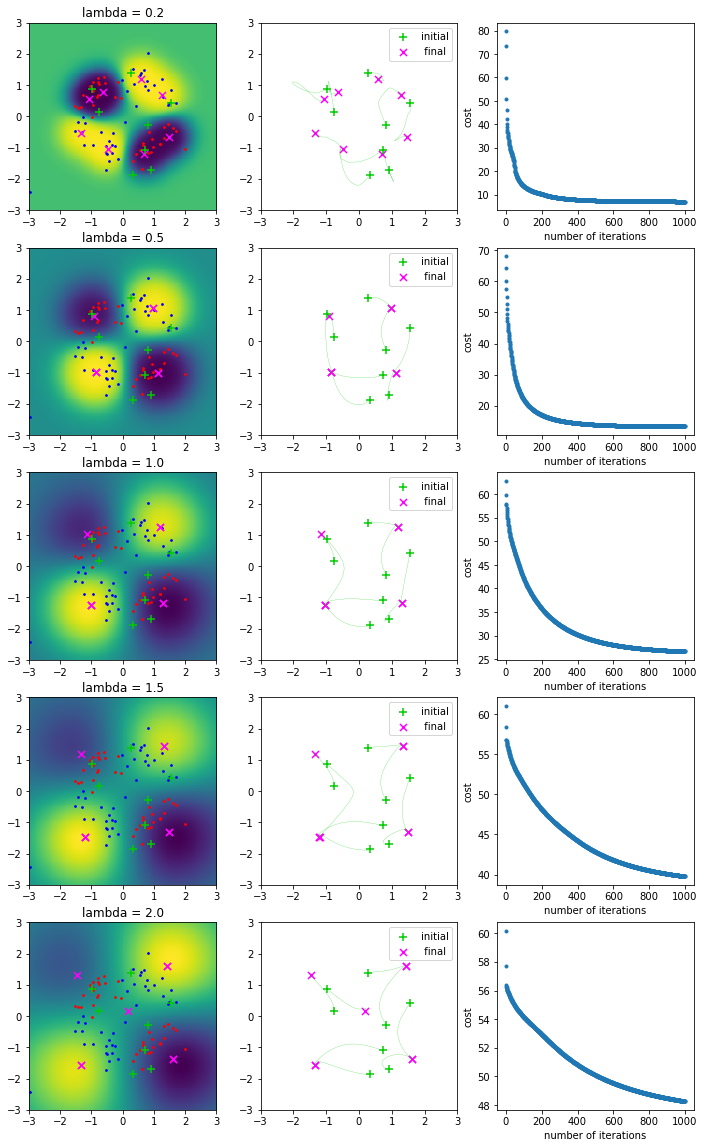

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
beta = 0.02
sgps = 1000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

389 steps done for beta = 0.02, lambda = 0.20 and prior std**2 = 100.00: 
phi = 
0.3592, -2.3460, 1.6924, 1.6919, -2.2040, 1.7277, -2.2010, 1.8031, -2.3759, 
alp = 
1.2117, -0.6005, -0.6005, -0.8157, 1.0445, -0.8156, 0.6536, 0.7626, 
-0.6644, -0.8739, -0.8739, 0.7582, 0.7742, 0.7582, 1.1094, -1.0440, 

533 steps done for beta = 0.02, lambda = 0.50 and prior std**2 = 100.00: 
phi = 
-0.1105, -2.1086, 1.7189, 1.7189, -2.6492, 2.1056, 1.7188, 2.1056, -2.1086, 
alp = 
1.0164, -0.6975, -0.6975, -0.9081, 0.9020, -0.6975, 0.9020, 1.0164, 
-0.9075, -0.9006, -0.9006, 0.8393, 0.9911, -0.9006, 0.9911, -0.9075, 

307 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 100.00: 
phi = 
-0.0443, -0.0314, 0.9385, 0.9497, -1.2418, 0.3072, -0.0030, 1.2420, -1.4055, 
alp = 
0.0328, -0.6478, -0.6522, -0.8763, 0.2999, -0.0022, 0.8337, 1.0156, 
-0.0209, -0.7754, -0.7806, 0.7905, 0.3247, -0.0030, 0.9529, -0.8629, 

225 steps done for beta = 0.02, lambda = 1.50 and prior std**2 = 100.00: 
phi = 
0.00

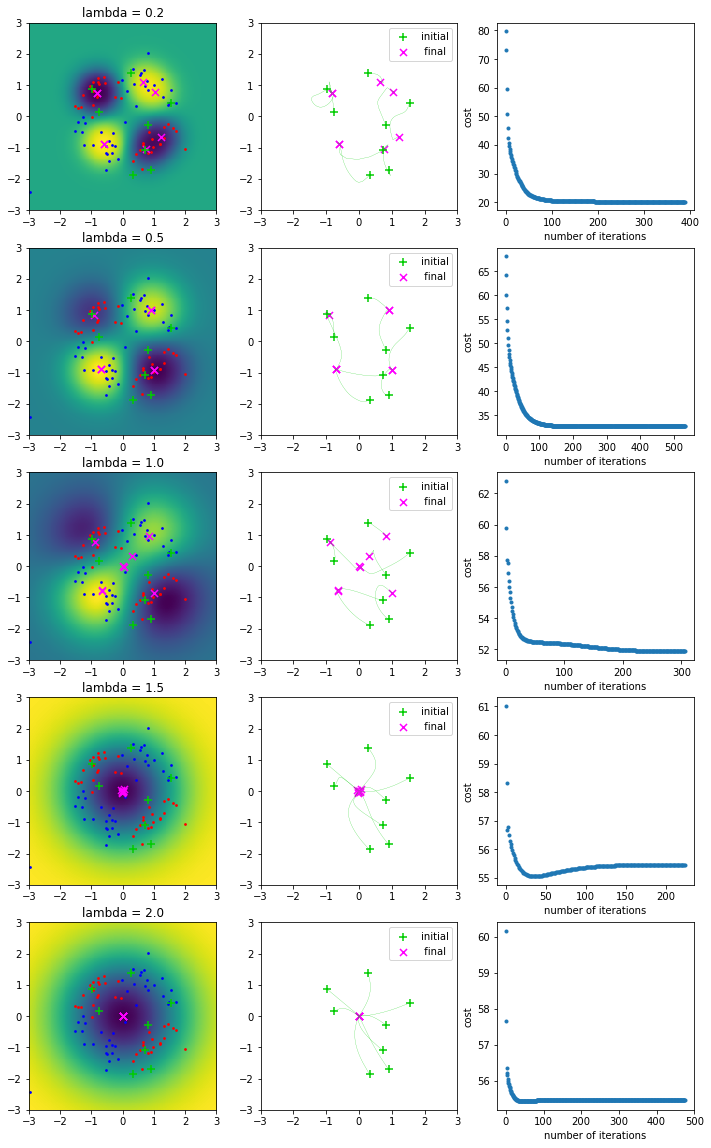

In [26]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
beta = 0.02
sgps = 100.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

1000 steps done for beta = 0.00, lambda = 1.00 and prior std**2 = 1000.00: 
phi = 
-0.0494, -0.0787, 0.3184, 0.3829, -0.5537, 0.1721, 0.1569, 0.4710, -0.1080, 
alp = 
0.2419, -0.1877, -0.2837, -0.4448, 0.1248, -0.0703, 0.3830, 0.1696, 
-0.0208, -0.2653, -0.4105, 0.4069, 0.0946, 0.0211, 0.4634, -0.2760, 

1000 steps done for beta = 0.02, lambda = 1.00 and prior std**2 = 1000.00: 
phi = 
-0.2971, -6.4669, 5.6923, 5.6384, -8.6376, 7.1023, 5.4162, 7.2401, -6.5144, 
alp = 
1.2955, -1.0239, -1.0237, -1.1558, 1.1789, -1.0227, 1.1791, 1.2957, 
-1.1836, -1.2559, -1.2557, 1.0234, 1.2426, -1.2547, 1.2429, -1.1837, 

1000 steps done for beta = 0.05, lambda = 1.00 and prior std**2 = 1000.00: 
phi = 
-0.8154, -9.0497, 7.7233, 7.7086, -10.9748, 9.8476, 7.6504, 9.8851, -9.0619, 
alp = 
1.2306, -1.1227, -1.1223, -0.9020, 1.3680, -1.1209, 1.3691, 1.2306, 
-1.1217, -1.4090, -1.4085, 0.7872, 1.3711, -1.4067, 1.3719, -1.1217, 

1000 steps done for beta = 0.10, lambda = 1.00 and prior std**2 = 1000.00: 
phi

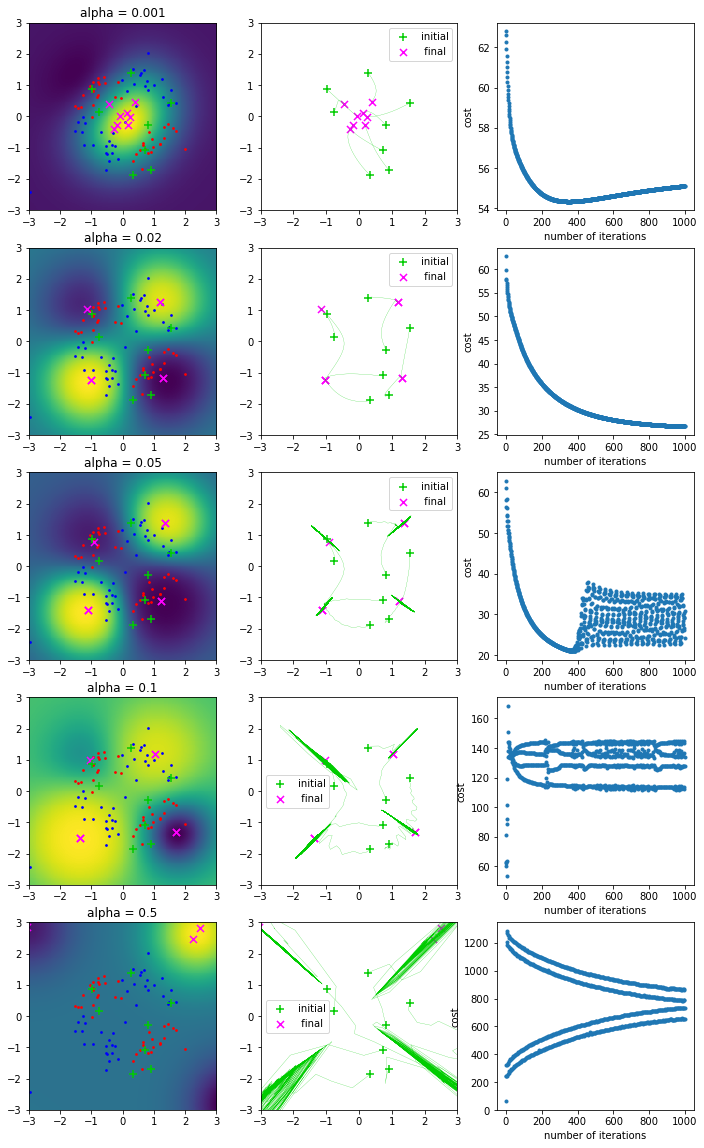

In [30]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
betas = [0.001, 0.02, 0.05, 0.1, 0.5]
sgps = 1000.0
lmd = 1.0
ax = 0
for beta in betas:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'momentum')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('alpha = {}'.format(beta))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')